<a href="https://colab.research.google.com/github/srinivasiyengar/NewCastle-University-Internship/blob/main/KSVDImageDenoiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                      image denoising using KSVDImageDenoiser

In [2]:
!pip install sparselandtools

     |████████████████████████████████| 13.1MB 359kB/s 
     |████████████████████████████████| 1.6MB 36.9MB/s 
     |████████████████████████████████| 225kB 48.5MB/s 
     |████████████████████████████████| 20.2MB 56.1MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 3.5MB 36.3MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 20.2MB 9.5MB/s 
     |████████████████████████████████| 3.3MB 39.8MB/s 
     |████████████████████████████████| 10.1MB 19.4MB/s 
     |████████████████████████████████| 163kB 51.5MB/s 
     |████████████████████████████████| 2.7MB 49.1MB/s 
     |████████████████████████████████| 901kB 39.9MB/s 
     |████████████████████████████████| 2.1MB 40.7MB/s 
     |████████████████████████████████| 92kB 7.7MB/s 
     |████████████████████████████████| 8.6MB 13.4MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 122kB 37.1M

In [64]:
import matplotlib.pyplot as plt
from sparselandtools.applications.denoising import KSVDImageDenoiser
from sparselandtools.pursuits import MatchingPursuit
from sparselandtools.dictionaries import DCTDictionary
import cv2
import numpy as np 

In [106]:
def KSVDImageDenoiser(img):
  from sparselandtools.applications.denoising import KSVDImageDenoiser
  from sparselandtools.pursuits import MatchingPursuit
  from sparselandtools.dictionaries import DCTDictionary
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  patch_size = 8
  initial_dictionary = DCTDictionary(patch_size, 11)
  denoiser = KSVDImageDenoiser(initial_dictionary, pursuit=MatchingPursuit)
  z, d, a = denoiser.denoise(img, sigma=20, patch_size=patch_size,
                           n_iter=4, multiplier=0.5, noise_gain=1.075)
  return z
  

pick  any image and run the following code to get its denoised image

In [185]:
image_set = []

In [188]:
img = cv2.imread('/5.jpg')
image_set.append(img)

INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:reconstructing
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:reconstructing
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
IN

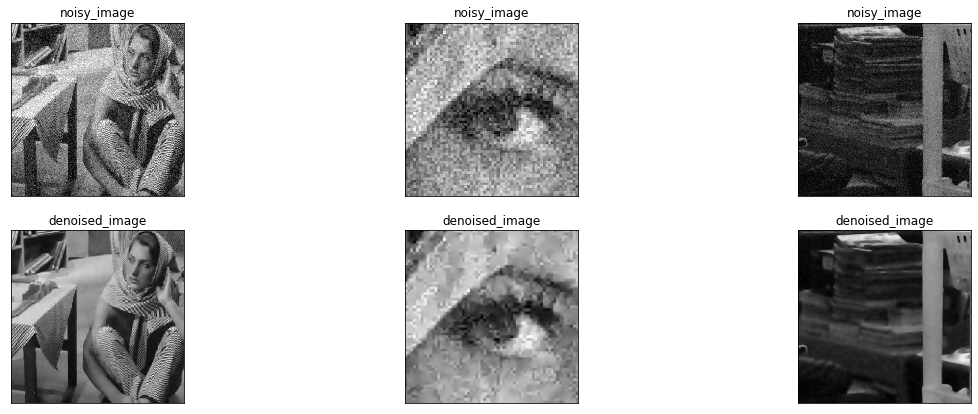

In [189]:
n = 3 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display reconstruction 
  ax = plt.subplot(2, n, i + n + 1) 
  plt.title("denoised_image") 
  z = KSVDImageDenoiser(image_set[i])
  plt.imshow(z, cmap='gray')
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

  # display original + noise 
  bx = plt.subplot(2, n, i + 1) 
  plt.title("noisy_image")
  image_set[i] = cv2.cvtColor(image_set[i], cv2.COLOR_RGB2GRAY) 
  plt.imshow(image_set[i], cmap='gray')
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  

  
plt.show()